### 1D Random Walk 

- Implement a 1D random walk (a particle move in a 1D space)
  - In one dimension the particle move **up or down** randomly with equal probability.
  - The walks occurs for a given **number of steps**. 

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)

- There is a **reflecting barrier (green)**. If the particle collides with the reflecting barrier, the next step is up. 

- There is an **absorbing barrier (red)**. If the particle collides with the abasorbing barrier the walk ends. 
  - The particle disappears (dies). 

- **Enumerate:**
  - The input (independent) variables of the system. This is how you set up your system. 
  - The output (dependent) variables of the system. This is what you observe according the system setup. 

- **What type of system are you modeling/observing?**
  - What is a system?
  - What is a model?
  - What is a simulation?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

DescribeResult(nobs=100000, minmax=(1.7566729357820776e-06, 0.9999942472751908), mean=0.4987423615043839, variance=0.08321161331561351, skewness=0.002848316276163389, kurtosis=-1.1949981419990496)


(array([1.0124076 , 0.99070744, 1.00330753, 1.00510755, 1.00400754,
        0.9982075 , 1.01390761, 0.99010744, 0.98830742, 0.99400746]),
 array([1.75667294e-06, 1.00001006e-01, 2.00000255e-01, 2.99999504e-01,
        3.99998753e-01, 4.99998002e-01, 5.99997251e-01, 6.99996500e-01,
        7.99995749e-01, 8.99994998e-01, 9.99994247e-01]),
 <BarContainer object of 10 artists>)

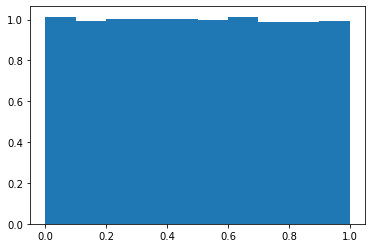

In [3]:
np.random.seed(10)
rv = np.random.random(100000)
print(stats.describe(rv))
plt.hist(rv, density=True)

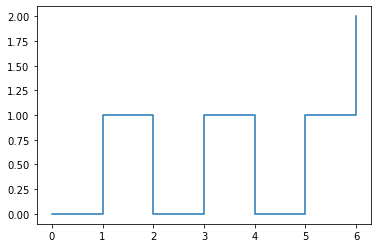

In [4]:
def make_walk(start, absorbing, reflecting):
    walk = [start]
    while True:
        if walk[-1] == reflecting:
            walk += [1]
        if walk[-1] == absorbing:
            break
        walk += [walk[-1] + int(np.random.random()*2)*2-1]
    return walk

start = 0
absorbing = 2
reflecting = 0

walk = make_walk(start, absorbing, reflecting)
plt.step(range(len(walk)), walk, where='post')

In [5]:
repetitions = 1000
walks = [len(make_walk(start, absorbing, reflecting))-1 for i in range(repetitions)]
stats.describe(walks)

DescribeResult(nobs=1000, minmax=(2, 20), mean=3.998, variance=8.020016016016015, skewness=2.040012221900846, kurtosis=5.075294040371505)

<BarContainer object of 10 artists>

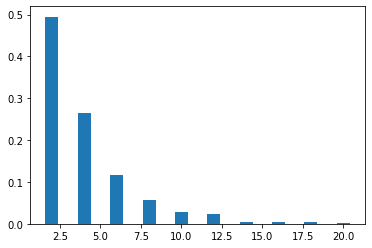

In [6]:
s, f = np.unique(walks, return_counts=True)
plt.bar(s, f/f.sum())

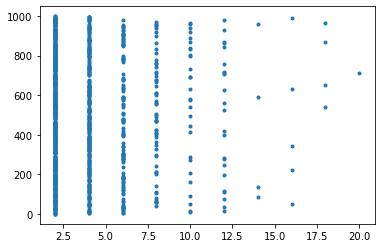

In [7]:
plt.plot(walks, range(repetitions), '.')

In [8]:
repetitions = 1000
absorbing = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
w_mean = []
for ai in absorbing:
    walks = [len(make_walk(start, ai, reflecting))-1 for i in range(repetitions)]
    w_mean += [np.mean(walks)]
w_mean

[1.0, 4.07, 9.21, 15.918, 26.334, 35.996, 47.264, 62.858, 78.764, 99.368]

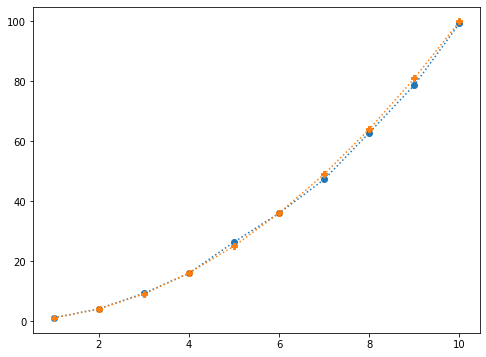

In [9]:
plt.figure(figsize=(8,6))
plt.plot(absorbing, w_mean, ':o', label="Simulation")
plt.plot(absorbing, np.power(absorbing, 2), ':P', label="Theory")